  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
label
ham     4825
spam     747
Name: count, dtype: int64
Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg      

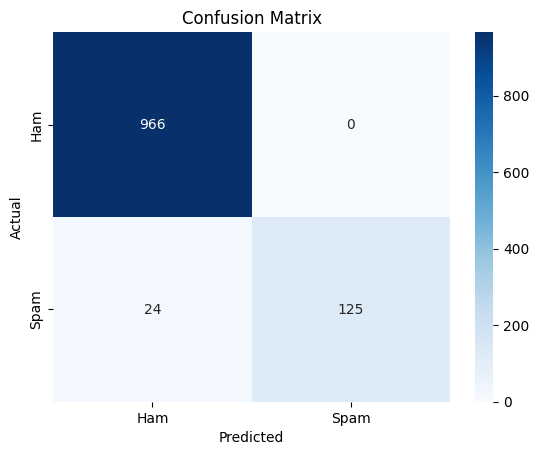

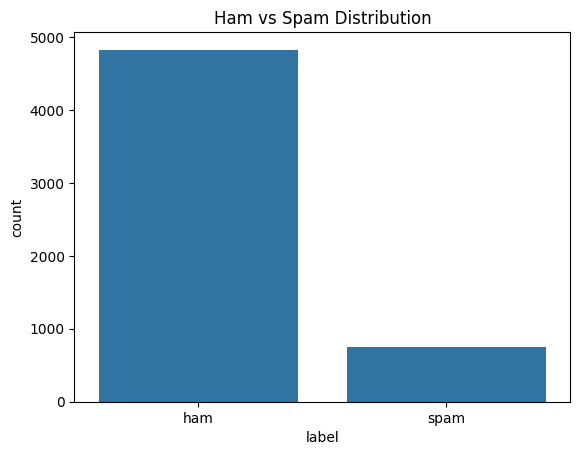

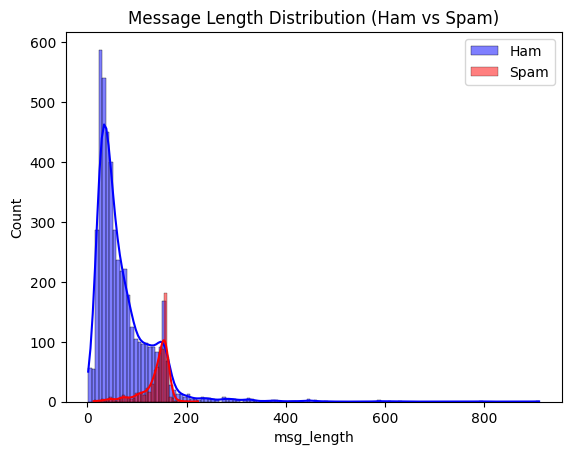

In [ ]:

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

df = pd.read_csv("SMSSpamCollection", sep="\t", names=["label", "message"])
print(df.head())


# 3. Basic Data Info

print(df.info())
print(df['label'].value_counts())


# 4. Data Cleaning & Preprocessing

# Convert labels to numeric (ham=0, spam=1)
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)


# 5. Feature Extraction (TF-IDF)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 6. Train Model (Naive Bayes)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


# 7. Predictions

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 8. Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 9. Exploratory Data Analysis (EDA)

# Spam vs Ham distribution
sns.countplot(data=df, x='label')
plt.title("Ham vs Spam Distribution")
plt.show()

# Message length distribution
df['msg_length'] = df['message'].apply(len)
sns.histplot(df[df['label']=='ham']['msg_length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['label']=='spam']['msg_length'], color='red', label='Spam', kde=True)
plt.legend()
plt.title("Message Length Distribution (Ham vs Spam)")
plt.show()